In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib notebook
plt.style.use('seaborn-white')
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 20

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [23]:
x=tf.Variable(0,dtype=tf.float32)
#Let's solve a cubic equation: (x-3)^3=x^3+27x-9x^2-27=0
func=x**3+27*x-9*x**2-27
sq_err=(func-0)**2
abs_err=np.abs(func)
#cost=tf.gradients(ys=func,xs=[x]) #Compute the derivative of cost

In [59]:
nsteps=1000

err=abs_err
costs=np.zeros(nsteps,float)
#train=tf.train.GradientDescentOptimizer(0.1).minimize(err)
train=tf.train.AdamOptimizer(0.1).minimize(err)
init = tf.global_variables_initializer() #MUST run this after choosing the optimizer so all values are initialized

with tf.Session() as session: #Using this form lets Python clean up if there is an exception
    session.run(init)
    for i in range(nsteps):
        costs[i]=np.asarray(session.run([train,err])[1])
    print (session.run([x,err]))


[2.9871335, 7.6293945e-06]


Text(0.5,0,'Iterations')

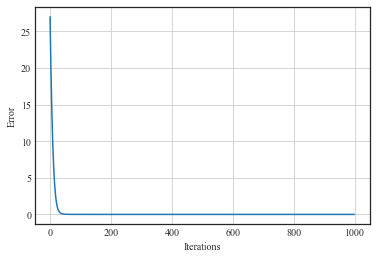

In [60]:
plt.close()
plt.plot(costs)
plt.grid()
plt.ylabel('Error')
plt.xlabel('Iterations')

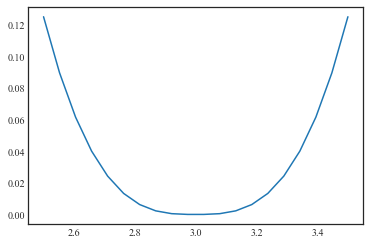

In [61]:
plt.close()
x2=np.linspace(2.5,3.5,20)
def y(x):
    return x**3+27*x-9*x**2-27
plt.plot(x2,np.abs(y(x2)))